# Fourierreihen

In [3]:
%matplotlib inline

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, IntSlider, FloatSlider

In [70]:
T = 3
L = 1.5
t = np.linspace(-L*T, L*T, 6000)
l = np.arange(-np.floor(L), np.floor(L)+1)

K_max = 50                # Anzahl der beruecks. Frequenzkomponenten
k = np.arange(K_max)      # Frequencindices
# Kosinus-Kern als Matrix (fuer Fouriersumme)
Cos = np.cos(2*np.pi/T*(t[:, None] @ k[None ,:]))
Cos[:, 0] = 0.5

## Fourierreihe eines Rechteckpulses


\begin{align}
    x(t) = \sum_{n = -\infty}^{\infty} \mathrm{rect} \left(\frac{t-nT}{DT}\right)
    = \mathrm{rect} \left(\frac{t}{DT}\right) \ast \sum_{n= -\infty}^{\infty} \delta \left(t-nT\right)
\end{align}

Es gilt: $\mathcal{F}\left\{\mathrm{rect}(t)\right\} = \mathrm{si}\left( \frac{\omega}{2} \right)$.
 
Mit dem Ähnlichkeitssatz, dem Faltungssatz und der Fouriertransformierten des Dirackammes folgt:

\begin{align}
    X(j\omega) = \mathcal{F}\left\{ x(t) \right\} &= TD\ \mathrm{si} \left( \frac{\omega T D}{2} \right) \frac{2 \pi}{T} \sum_{k= -\infty}^{\infty} \delta \left( \omega - k\frac{2 \pi}{T} \right) \\
    &=  \sum_{k= -\infty}^{\infty} D\ \mathrm{si} \left( k D \pi \right)\ 2 \pi \delta \left( \omega - k\frac{2 \pi}{T} \right)
\end{align}



Also gilt: $X_k = D\ \mathrm{si} \left( k D \pi \right)$ und mit $a_k = X_k + X_{-k}$ folgt:

\begin{align}
\Rightarrow x(t) = \sum_{k= -\infty}^{\infty} D\ \mathrm{si} \left( k D \pi \right)\ \mathrm{e}^{j k \frac{2 \pi}{T} t}
= D + \sum_{k= 1}^{\infty} 2D\ \mathrm{si} \left( k D \pi \right) \mathrm{cos} \left(k \frac{2 \pi}{T} t \right)
\end{align}

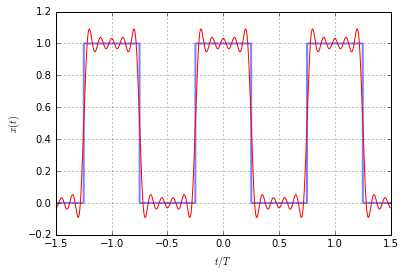

In [81]:
@interact(K=IntSlider(min=1, max=50, step=1, value=10), 
          D=FloatSlider(min=0, max=1, step=0.05, value=0.5))
def plot_rect(K, D):
    assert(K <= K_max)

    ref = 1.0*(t)
    a_k = 2*D*np.sinc(k*D)
    
    # reference signal: recht
    x = np.sum(1.0*(np.abs(t[:,None] - l[None, :]*T) < D*T/2), 1)
    
    # Fouriersumme als Matrixprodukt
    x_c = Cos[:, :K] @ a_k[:K, None]
    
    plt.plot(t/T, x, alpha=0.5, lw=2)
    plt.plot(t/T, x_c, 'r');
    plt.grid(True);
    plt.ylabel('$x(t)$');
    plt.xlabel('$t/T$');
    plt.ylim((-0.2, 1.2))

## Fourierreihe eines Dreieckpulses

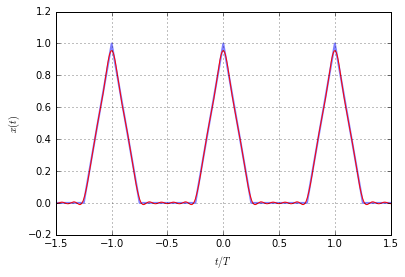

In [82]:
@interact(K=IntSlider(min=1, max=50, step=1, value=10), 
          D=FloatSlider(min=0, max=1, step=0.05, value=0.5))
def plot_triag(K, D):
    assert(K <= K_max)

    a_k = D*np.sinc(k*D/2)**2

    x_ref = np.sum(np.maximum(
        1-np.abs(t[:,None] - l[None, :]*T)*2.0/(D*T), 0), 1)
    
    x_c = Cos[:, :K] @ a_k[:K, None]
    
    plt.plot(t/T, x_ref, alpha=0.5, lw=2)
    plt.plot(t/T, x_c, 'r');
    plt.grid(True);
    plt.ylabel('$x(t)$');
    plt.xlabel('$t/T$');
    plt.ylim((-0.2, 1.2))